# CLIMATE DATA CHALLENGE 2022

## Understanding Drivers of Uncerainty in Future Loss Projections

### Exposure scenario, sensitivity to:

- Popultation increases
- locality
- building type
- cost

In [ ]:
# Load libraries

In [1]:
import sys

import numpy as np

import pandas as pd

import ascend
from ascend import shape

import datetime

import iris

from matplotlib import pyplot as plt
import matplotlib.cm as cm

#import warnings
#warnings.filterwarnings('ignore')

In [2]:
# Define data filenames and paths

In [21]:
datadir = "/net/home/h04/jmendes/ClimateDataChallenge/Met-Office-Climate-Data-Challenge-May-2022/data"
fexposure = "UKMO_HACKATHON_EXPOSURE"
lst_countries = ["United Kingdom"]

ssp_datadir = "/data/users/ldawkins/UKCR/DataForPaper/UKSSPs"
ssp1_pop = "population_SSP1_12km.nc"
ssp5_pop = "population_SSP5_12km.nc"
ssp1_urb = "urbanisation_SSP1_12km.nc"
ssp5_urb = "urbanisation_SSP5_12km.nc"

In [4]:
# Functions

In [5]:
def read_file(datadir, fname, country="all"):
    '''
    Read files from input directory.
    
    Args:
        datadir (str): Path to input data dir
        fname (str): Name of CSV file to load
        country (list (str)): Country names to be selected.
                              Default is to load all countries.
    
    Returns:
        Pandas dataframe of input data with 15-17 columns.
    '''

    # define filename
    file = f"{datadir}/{fname}.csv"

#    # define names of columns
#    columns = [
#        "LocationSID",
#        "LocationName",
#        "BuildingsReplacement",
#        "ContentsReplacement",
#        "BusinessInteruptionReplacement",
#        "CurrencyCode",
#        "Territory",
#        "CountryName",
#        "PostalCode",
#        "PostalName",
#        "Latitude",
#        "Longitude",
#        "Stories",
#        "Occupancy",
#        "Construction"
#    ]
    
    # read file as dataframe and return
#    return pd.read_csv(file, header = 1, names = columns)
    # Make a one column dataframe with each row being a line in the CSV file
    # original file is latin1 encoded
    df = pd.read_fwf(file, header=None, encoding='latin1')
    # split each row on commas and expand the dataframe
    dfmod = df[0].str.split(',', expand=True)
    if country == "all":
        return dfmod
    else:
        return dfmod.loc[dfmod.iloc[:,7].isin(country)]

#TODO: add multiple countries, isin?   


In [6]:
def convert_time(cube):
    '''
    Convert cube's time coordinate onto decade.
    
    Args:
        cube(iris cube): Input SSP cube.
                         time units are 'hours since 1970-01-01 00:00:00'
                         in Gregorian calendar.
    
    Returns:
        List of decades (datetime year format)
    '''


    decades = []
    for t in cube.coord("time"):
        decades.append(datetime.datetime.fromtimestamp(int(t.points)*3600).year)
    
    return decades

In [7]:
# Analyse exposure dataset

In [8]:
data = read_file(datadir, fexposure, country=lst_countries)

In [9]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
430,272305,48_United Kingdom,1730354082.412524,865177041.20626199,865177041.20626199,EUR,GBR,United Kingdom,BT29 4RT,BT29 4RT,54.609100,-6.335300,4,General commercial,Reinforced concrete MRF w/ URM,None,None,None
7798,286329,78_United Kingdom,8001549283.6886797,4000774641.8443398,4000774641.8443398,EUR,GBR,United Kingdom,FK13 6LY,FK13 6LY,56.133700,-3.729800,1,General commercial,Reinforced concrete MRF w/ URM,None,None,None
7978,286506,81_United Kingdom,2528671562.157321,1264335781.07866,1264335781.07866,EUR,GBR,United Kingdom,FK13 6LY,FK13 6LY,56.133700,-3.729800,4,General commercial,Reinforced concrete MRF w/ URM,None,None,None
9421,305569,46_United Kingdom,154890746.21993601,77445373.109968007,77445373.109968007,EUR,GBR,United Kingdom,BT29 4RT,BT29 4RT,54.609100,-6.335300,6,General commercial,Reinforced concrete MRF w/ URM,None,None,None
9485,305725,50_United Kingdom,51630248.739978999,25815124.369989,25815124.369989,EUR,GBR,United Kingdom,BT29 4RT,BT29 4RT,54.609100,-6.335300,6,General commercial,Reinforced concrete MRF w/ URM,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2454461,315833,129_United Kingdom,7541208975.8136396,3770604487.9068198,3770604487.9068198,EUR,GBR,United Kingdom,LD4 4ES,LD4 4ES,52.090600,-3.592200,1,General commercial,Unreinforced masonry bearing frame,None,None,None
2454587,315994,134_United Kingdom,1662349860.763505,831174930.38175201,831174930.38175201,EUR,GBR,United Kingdom,LD4 4ES,LD4 4ES,52.090600,-3.592200,4,General commercial,Unreinforced masonry bearing frame,None,None,None
2455727,332557,58_United Kingdom,984707575.053859,492353787.52692902,492353787.52692902,EUR,GBR,United Kingdom,BT29 4RT,BT29 4RT,54.609100,-6.335300,4,General commercial,Unreinforced masonry bearing frame,None,None,None
2458209,137129,18_United Kingdom,33292404826.163597,16646202413.081799,16646202413.081799,EUR,GBR,United Kingdom,CV23 0WE,CV23 0WE,52.401500,-1.242500,2,General commercial,Unreinforced masonry bearing frame,None,None,None


In [10]:
# Assign column names
cols_dict = {
    list(data)[0]: "LocationSID",
    list(data)[1]: "LocationName",
    list(data)[2]: "BuildingsReplacement",
    list(data)[3]: "ContentsReplacement",
    list(data)[4]: "BusinessInteruptionReplacement",
    list(data)[5]: "CurrencyCode",
    list(data)[6]: "Territory",
    list(data)[7]: "CountryName",
    list(data)[8]: "PostalCode",
    list(data)[9]: "PostalName",
    list(data)[10]: "Latitude",
    list(data)[11]: "Longitude",
    list(data)[12]: "Stories",
    list(data)[13]: "Occupancy",
    list(data)[14]: "Construction"
}

data.rename(columns=cols_dict, inplace=True)

In [11]:
# Save country data with assign column names
data.iloc[:,:15].to_csv(f"{datadir}/{fexposure}_UK.csv", header=True, index=False)

In [12]:
# Get list of fields:
print("Stories: ", data["Stories"].unique())
print("Occupancy: ", data["Occupancy"].unique())
print("Construction: ", data["Construction"].unique())

Stories:  ['4' '1' '6' '2' '7']
Occupancy:  ['General commercial' 'General residential' 'General industrial']
Construction:  ['Reinforced concrete MRF w/ URM' 'Unreinforced masonry bearing frame'
 'Wood frame' 'Braced steel frame' 'Pre-cast concrete w/ shear wall'
 'Steel MRF' 'Unreinforced masonry bearing wall' 'Reinforced concrete MRF']


In [13]:
# Analyse shapefile

In [14]:
shp = shape.load_shp(f"{datadir}/Control_scenario_UK.shp")
#shape.inspect_shp_info(f"{datadir}/Control_scenario_UK.shp")

In [15]:
#shape.show(shp, bounds=[-20, 40, 35, 72], scale="50m")

In [16]:
ne_dir = "/project/cst/ascend/natural_earth/50m_physical"
river_shapefile = f"{ne_dir}/ne_50m_rivers_lake_centerlines.shp"

In [17]:
#rivers = shape.load_shp(river_shapefile)
#rivers.show(bounds=[-4., 3., 50., 55.], scale='10m')

#rivers_select = [
#    "Ness",
#    "Oich",
#    "Trent",
#    "Severn",
#    "Caledonian Canal",
#    "Thames",
#    "Annalee",
#    "Great Ouse",
#    "Tweed",
#    "Wye",
#    "Swale",
#    "Bann",
#    "Tay",
#    "Blackwater"
#]
#
#for river in rivers_select:
#    river_shape = shape.load_shp(river_shapefile, name=river)[0]
#    river_shape.show(bounds=[-4., 3., 50., 55.], scale='50m')

[ascend.Shape object
data: <class 'shapely.geometry.linestring.LineString'>
attributes: featurecla: River
attributes: name: Thames
attributes: note: None
...
is_valid: True
coord_system: GeogCS(6371229.0)]


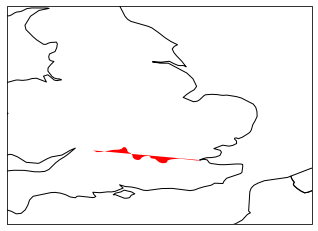

In [18]:
thames_shape = shape.load_shp(river_shapefile, name='Thames')[0] #select first shape from the list
thames_shape.show(bounds=[-4., 3., 50., 55.], scale='50m')

In [19]:
# Analyse SSPs

In [23]:
# SSP1, population
pop1 = iris.load_cube(f"{ssp_datadir}/{ssp1_pop}")
pop1_decades = convert_time(pop1)

In [24]:
# SSP5, population
pop5 = iris.load_cube(f"{ssp_datadir}/{ssp5_pop}")
pop5_decades = convert_time(pop5)

In [25]:
# SSP1, urbanisation
urb1 = iris.load_cube(f"{ssp_datadir}/{ssp1_urb}")
urb1_decades = convert_time(urb1)

In [26]:
# SSP5, urbanisation
urb5 = iris.load_cube(f"{ssp_datadir}/{ssp5_urb}")
urb5_decades = convert_time(urb5)

In [ ]:
# changes average annual loss across the UK, given changes in: population, urbanisation
# SSPs 1,5; 2 climate change scenarios
# + EP basis, CAP model

In [ ]:
# MAIN
def main():
    '''
    Loop through changes.
    Plot.
    '''


In [ ]:
if __name__ == '__main__':
    main()